# EDA for Steam and BGG dataset

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
bgg_data = pd.read_csv('../scraping_cleaning_normalizing/bgg_GameItem.csv', index_col=0)
bgg_data.head()

,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
bgg_id,,,,,,,,,,,,,,,,,,,,,
1,Die Macher,1986.0,5497,1,"12517,4959","133,2,2726,15108,39249,11652,5382,8147",3.0,5.0,4.0,5.0,...,1.59000,7.15118,4.3373,1.152778,NaN,NaN,NaN,NaN,NaN,NaN
2,Dragonmaster,1981.0,5497,8384,12424,"64,20",3.0,4.0,3.0,4.0,...,1.44751,5.80753,1.9630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Samurai,1998.0,5497,2,11883,"17,133,267,29,7340,7335,41,2973,4617,1391,8291...",2.0,4.0,2.0,4.0,...,1.18382,7.24614,2.4933,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,Tal der Könige,1992.0,NaN,8008,2277,37,2.0,4.0,2.0,4.0,...,1.22230,5.70099,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Acquire,1964.0,5497,4,"12658,18317","92,5,4871,3082,858,2962,5392,4668,38,4622,7107",2.0,6.0,3.0,6.0,...,1.33662,7.16706,2.5070,1.090278,NaN,NaN,NaN,NaN,NaN,NaN


## More boardgames than ever

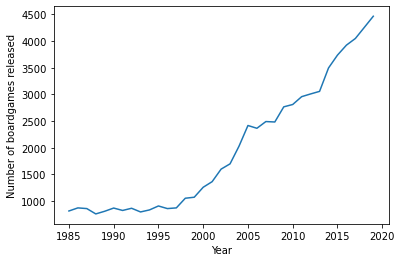

In [3]:
releases_per_year = bgg_data.groupby('year', as_index=False).count()
releases_per_year = releases_per_year[releases_per_year.year.between(1985, 2019)]

p = sns.lineplot(data=releases_per_year, x='year', y='name')
p.set(xlabel='Year', ylabel='Number of boardgames released');

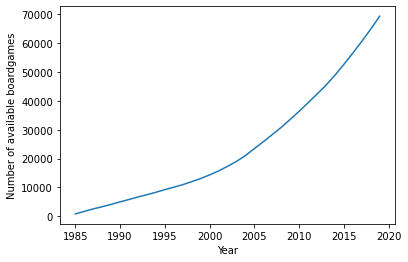

In [4]:
releases_per_year = releases_per_year[releases_per_year.year.between(1985, 2019)]

total = []
running_total = 0
for year in releases_per_year.year:
    running_total += releases_per_year.name[releases_per_year.year==year].values[0]
    total.append(running_total)

p = sns.lineplot(x=releases_per_year.year, y=total)
p.set(xlabel='Year', ylabel='Number of available boardgames');

## Why not steam ratings?

## Transforming Steam playtimes and BGG ratings to be on the same scale

In [ ]:
# Load data sets
# data_cleaned = exclusions and normalization
# data_messy = no exclusions or normalizaton

data_clean = pd.read_csv('bgg_steam_data_normed.csv', index_col=0)
print('''This is the cleaned and normed dataset
    For steam games, rating is log-transformed playtime''')
data_clean[data_clean.game=='steam280'].head()

In [6]:
data_messy = pd.read_csv('bgg_steam_data.csv', index_col=0)
print(
    '''This is the messy dataset
    For steam games, rating is raw playtime''')
data_messy[data_messy.game=='steam280'].head()

This is the messy dataset
    For steam games, rating is raw playtime


,user,game,rating,source
161094,Ar13,steam280,33.0,steam
171316,skywalka95,steam280,270.0,steam
181112,tipulsar85,steam280,81.0,steam
181113,tipulsar85,steam280,81.0,steam
181459,JackassOfAllTrades,steam280,18.0,steam


In [7]:
print("There are quite a few exclusions of uncommon games and inactive users:")
print("before exclusions: rows in messy data: {}".format(len(data_messy)))
print("after exclusions: rows in clean data: {}".format(len(data_clean)))

There are quite a few exclusions of uncommon games and inactive users:
before exclusions: rows in messy data: 561885
after exclusions: rows in clean data: 440794


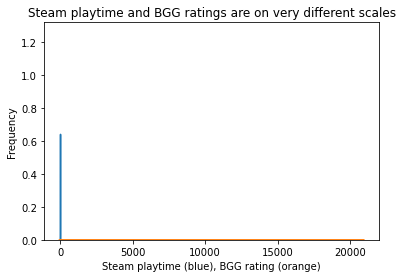

In [8]:
plot = sns.distplot(data_messy[data_messy.source=='bgg'].rating)
sns.distplot(data_messy[data_messy.source=='steam'].rating)
plot.set(xlabel='Steam playtime (blue), BGG rating (orange)', 
         ylabel = 'Frequency', 
         title = 'Steam playtime and BGG ratings are on very different scales');

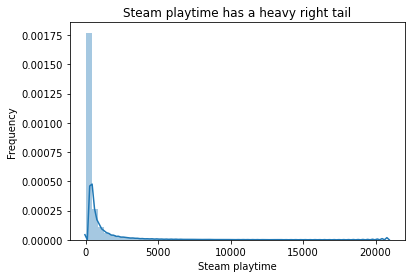

In [9]:
plot = sns.distplot(data_messy[data_messy.source=='steam'].rating)
plot.set(xlabel='Steam playtime', 
         ylabel = 'Frequency', 
         title = 'Steam playtime has a heavy right tail');

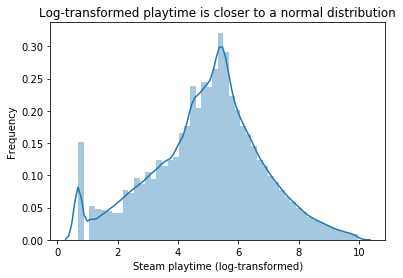

In [24]:
plot = sns.distplot(np.log1p(data_messy[data_messy.source=='steam'].rating))
plot.set(xlabel='Steam playtime (log-transformed)', 
         ylabel = 'Frequency', 
         title = 'Log-transformed playtime is closer to a normal distribution');


In [ ]:
plot = sns.distplot(data_clean[data_clean.source=='steam'].rating)
plot = sns.distplot(data_clean[data_clean.source=='bgg'].rating)
plot.set(xlabel='Steam transformed playtime (blue), BGG rating (orange)', 
         ylabel = 'Frequency', 
         title = 'Steam playtime and BGG ratings are now on similar scales');

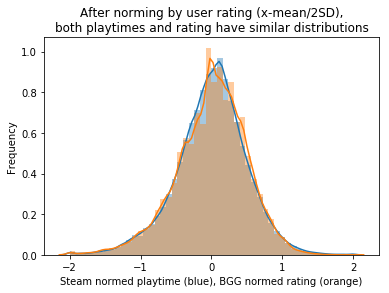

In [26]:
plot = sns.distplot(data_clean[data_clean.source=='steam'].rating_normed)
plot = sns.distplot(data_clean[data_clean.source=='bgg'].rating_normed)
plot.set(xlabel='Steam normed playtime (blue), BGG normed rating (orange)', 
         ylabel='Frequency', 
         title='After norming by user rating (x-mean/2SD),\nboth playtimes and rating have similar distributions');

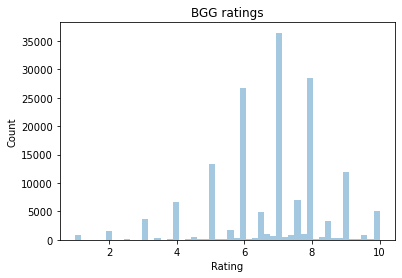

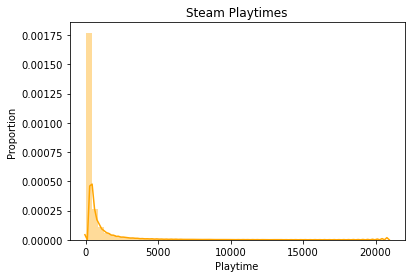

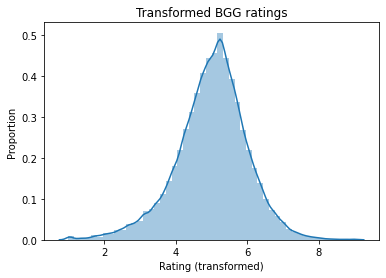

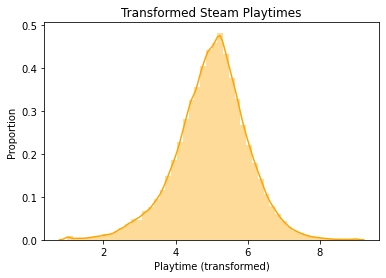

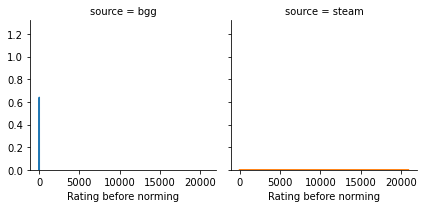

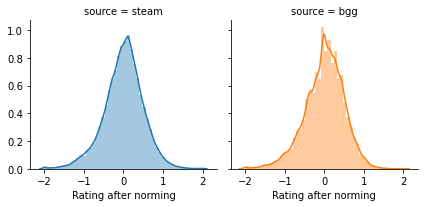

In [31]:
x = sns.distplot(data_messy.rating[data_messy.source=='bgg'], kde=False)
x.set(xlabel = 'Rating', ylabel='Count', title = 'BGG ratings')
plt.show()

x = sns.distplot(data_messy.rating[data_messy.source=='steam'], color='orange')
x.set(xlabel = 'Playtime', ylabel='Proportion', title = 'Steam Playtimes')
plt.show()

data_clean['rating_normed_2'] = data_clean.rating_normed * 2 +5

x = sns.distplot(data_clean.rating_normed_2[data_messy.source=='bgg'])
x.set(xlabel = 'Rating (transformed)', ylabel='Proportion', title = 'Transformed BGG ratings')
plt.show()

x = sns.distplot(data_clean.rating_normed_2[data_clean.source=='steam'], color='orange')
x.set(xlabel = 'Playtime (transformed)', ylabel='Proportion', title = 'Transformed Steam Playtimes')
plt.show()

plot = sns.FacetGrid(data_messy, col='source', hue='source', margin_titles=True)
plot.map(sns.distplot, 'rating')
plot.set(xlabel='Rating before norming')

plot = sns.FacetGrid(data_clean, col='source', hue='source', margin_titles=True)
plot.map(sns.distplot, 'rating_normed')
plot.set(xlabel='Rating after norming');

## Is there a relationship between the video games you play and the board games you play?

Subtitle: don't run k-means and PCA on sparse super-high-dimensional data

In [29]:
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF, PCA

In [30]:
bgg_ratings = data_clean[data_clean.source=='bgg']
steam_ratings = data_clean[data_clean.source=='steam']

In [31]:
ui_matrix_bgg = bgg_ratings.pivot_table(values='rating_normed', 
                                        index='user',
                                        columns='game')

ui_matrix_steam = steam_ratings.pivot_table(values='rating_normed',
                                           index='user',
                                           columns='game')

ui_matrix_bgg

game,"...and then, we held hands.",10 Days in Africa,10 Days in Asia,10 Days in Europe,10 Days in the Americas,10 Days in the USA,10' to Kill,1000 Blank White Cards,11 nimmt!,12 Days,...,Zombie Plague,Zombie State: Diplomacy of the Dead,Zombie in my Pocket,ZombieTown,Zombies!!!,Zombies!!! 4: The End...,Zooloretto,Zooloretto: The Dice Game,ZÈRTZ,duck! duck! Go!
user,,,,,,,,,,,,,,,,,,,,,
0492372665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21n6y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2lip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8bitdad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aarontu,NaN,NaN,NaN,0.327088,0.327088,NaN,NaN,-0.346096,NaN,NaN,...,-0.076822,-0.076822,0.057815,NaN,NaN,NaN,0.057815,NaN,NaN,NaN
abnormalend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.015591,NaN,NaN,NaN,NaN,NaN
acorns2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
adamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.143259,NaN,NaN,NaN
adiamant,NaN,-0.735387,NaN,NaN,NaN,-0.735387,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
ui_matrix_steam.head()

game,steam10,steam100,steam1000030,steam1003400,steam1005300,steam1007040,steam10090,steam10100,steam1010750,steam10110,...,steam994220,steam996470,steam996580,steam99700,steam99810,steam99830,steam99890,steam99900,steam99910,steam999730
user,,,,,,,,,,,,,,,,,,,,,
0492372665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21n6y,0.316227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2lip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8bitdad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aarontu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.361006,NaN,NaN,NaN,0.007469,NaN,NaN


In [33]:
X = np.array(ui_matrix_bgg)
X = X+5
X = np.nan_to_num(X)

model = NMF(n_components=5, init='random', random_state=0)
W1 = model.fit_transform(X)
H2 = model.components_

Y = np.array(ui_matrix_steam)
Y = Y+5
Y = np.nan_to_num(Y)

model = NMF(n_components=5, init='random', random_state=0)
W2 = model.fit_transform(X)
H2 = model.components_

In [34]:
kmeans_bgg = KMeans(n_clusters=10).fit(W1)
kmeans_steam = KMeans(n_clusters=10).fit(W2)

print(len(kmeans_bgg.labels_), len(kmeans_steam.labels_))
print(kmeans_bgg.labels_, kmeans_steam.labels_)

1203 1203
[2 4 0 ... 6 6 5] [9 3 0 ... 6 6 2]


In [35]:
x = adjusted_rand_score(kmeans_bgg.labels_, kmeans_steam.labels_)
print(x)

0.7214723419955688


In [36]:
model = PCA(n_components=5)
pca_bgg = model.fit(X)

model = PCA(n_components=5)
pca_steam = model.fit(Y)

print('explained variance for BGG PCs: ' + str(pca_bgg.explained_variance_ratio_))
print('explained variance for Steam PCs: ' + str(pca_steam.explained_variance_ratio_))

explained variance for BGG PCs: [0.14000564 0.03723111 0.01856847 0.01509327 0.01209207]
explained variance for Steam PCs: [0.12968195 0.04067772 0.01739128 0.01452884 0.01216589]


In [37]:
# Cluster similar boardgamers together using k-means
# Cluster similar bgers togeher using k-means
# Compare the two sets of clusters

kmeans_bgg = KMeans(n_clusters=10).fit(pca_bgg.fit_transform(X))
kmeans_steam = KMeans(n_clusters=10).fit(pca_steam.fit_transform(Y))

print(len(kmeans_bgg.labels_), len(kmeans_steam.labels_))
print(kmeans_bgg.labels_, kmeans_steam.labels_)


1203 1203
[4 2 4 ... 6 6 8] [0 5 0 ... 0 4 8]


In [38]:
x = adjusted_rand_score(kmeans_bgg.labels_, kmeans_steam.labels_)
print(x)

-0.0012738761014786527
